In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from operator import itemgetter

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_file, encoding="utf-8")
df_clinic = pd.read_csv(clinical_file, encoding='utf-8')

# Combine the data into a single dataset

df_data = pd.merge(df_mouse, df_clinic, on='Mouse ID')

# Display the data table for preview
#g989 seems to have been involved in testing for two different drugs unlike the others
df_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Group the data by Drug and Timepoint
df_data_dt = df_data.groupby(['Drug','Timepoint'])
# then find mean and standard error
means = df_data_dt['Tumor Volume (mm3)'].mean()
errors = df_data_dt['Tumor Volume (mm3)'].sem()
#Then create dataframes for plotting
df_means = means.unstack().transpose()
df_errors = errors.unstack().transpose()


df_means


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


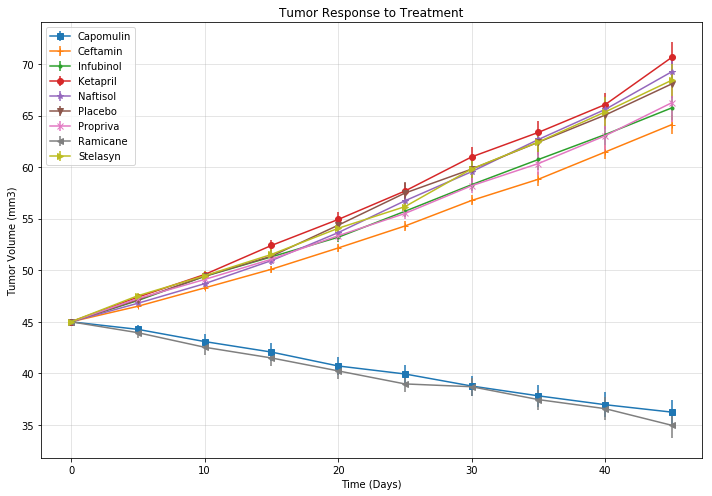

In [3]:
# Generate the Plot (with Error Bars)

x = itertools.cycle(['s', '+', '.', 'o', '*', 'v','x','<','>','-']) 
y = len(df_means)-1

for i in range(0,y):
    chart = df_means.iloc[:, i].plot(yerr=df_errors, kind='line', figsize=(10,7), marker=next(x))
chart.set_title('Tumor Response to Treatment')
chart.set_xlabel('Time (Days)')
chart.set_ylabel('Tumor Volume (mm3)')
chart.legend(loc='best')
plt.tight_layout()
plt.grid(alpha=0.4)
# Save the Figure
plt.savefig('tumor_response.png')

In [4]:
# Show the Figure

plt.show()

## Metastatic Response to Treatment

In [5]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Then create dataframes for plotting
mms_means = df_data_dt['Metastatic Sites'].mean().unstack().transpose()
mms_errors = df_data_dt['Metastatic Sites'].sem().unstack().transpose()

mms_means

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


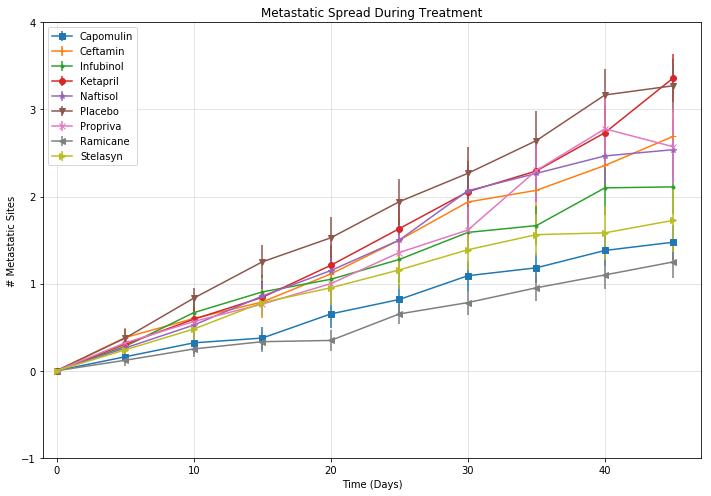

In [6]:
# Generate the Plot (with Error Bars)
x = itertools.cycle(['s', '+', '.', 'o', '*', 'v','x','<','>','-']) 
y = len(df_means)-1

for i in range(0,y):
    chart = mms_means.iloc[:, i].plot(yerr=mms_errors, kind='line', figsize=(10,7), marker=next(x))
chart.set_title('Metastatic Spread During Treatment')
chart.set_xlabel('Time (Days)')
chart.set_ylabel('# Metastatic Sites')
chart.legend(loc='best')
plt.tight_layout()
plt.grid(alpha=0.4)
plt.xlim(-1,47)
plt.ylim(-1, 4)
# Save the Figure
plt.savefig('metastatic_response.png')
# Show the Figure
plt.show()

## Survival Rates

In [7]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = df_data_dt['Mouse ID'].count().unstack().transpose()

survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [8]:
# Calculate the percentage survived over time, referencing the first row as starting population
# 
for i in range(1,len(survival.columns)):
    survival.iloc[i] = survival.iloc[i].divide(survival.iloc[0]).multiply(100)
survival
#This leaves the 0 timepoint untouched, otherwise iterating would throw off the percent calculation
#Fudging that in the next cell...

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25.0,25.0,25.0,25.0,25.0,25.0,26.000000,25.0,26.000000,25.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


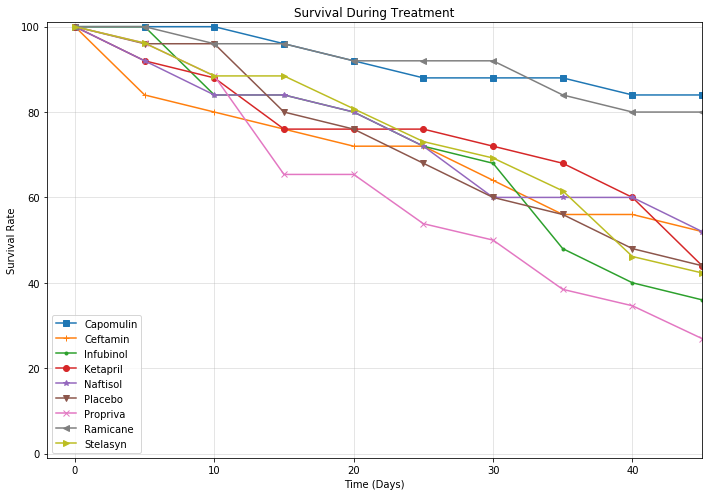

In [9]:
#Setting the zero timepoint to 100% survival for each drug
survival.iloc[0] = 100
survival
# Generate the Plot - selecting markers from a list
x = itertools.cycle(['s', '+', '.', 'o', '*', 'v','x','<','>','-']) 
y = len(survival)-1

for i in range(0,y):
    chart = survival.iloc[:, i].plot(kind='line', figsize=(10,7), marker=next(x))
chart.set_title('Survival During Treatment')
chart.set_xlabel('Time (Days)')
chart.set_ylabel('Survival Rate')
chart.legend(loc='best')
plt.tight_layout()
plt.grid(alpha=0.4)
plt.xlim(-2, 45)
plt.ylim(-1, 101)
# Save the Figure
plt.savefig('survival_rates.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [10]:
# Calculate the percent changes for each drug

pct_change = df_means.iloc[9].subtract(df_means.iloc[0])/df_means.iloc[0]*100

# Note: Percent change = (End Value - Start Value) ÷ Start Value*100

# Display the data to confirm
tumor_delta = pd.DataFrame({'Drug': pct_change.index,
                          'Change':pct_change.values,
                           'Error':df_errors.iloc[9]})

tumor_delta = tumor_delta.sort_values('Change')
tumor_delta.reset_index(drop=True)

,Drug,Change,Error
0,Ramicane,-22.320900,1.226805
1,Capomulin,-19.475303,1.223977
2,Ceftamin,42.516492,0.902358
3,Infubinol,46.123472,1.144427
4,Zoniferol,46.579751,1.003576
5,Propriva,47.241175,1.888586
6,Placebo,51.297960,1.351726
7,Stelasyn,52.085134,1.576556
8,Naftisol,53.923347,1.416363
9,Ketapril,57.028795,1.453186


(-27.320900462766673, 62.028794686606076)

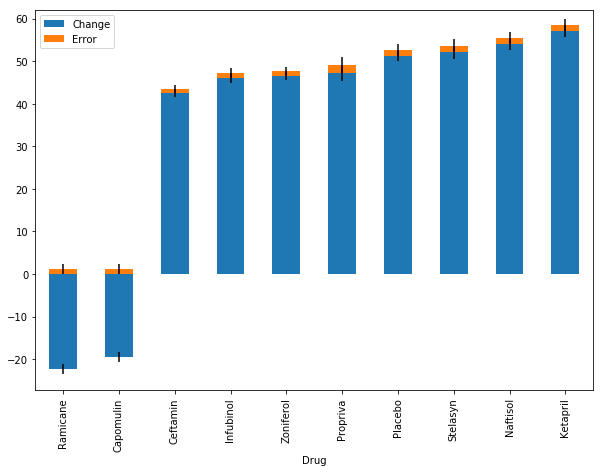

In [11]:
chart = tumor_delta.plot(yerr=tumor_delta['Error'], kind='bar', figsize=(10,7), stacked=True)

# Save the Figure
# Set the y limits of the current chart
plt.ylim(tumor_delta['Change'].min()-5, tumor_delta['Change'].max() + 5) #NOTE you can use a function
# plt.title("Tumor Change Over 45 Day Treatment")
# plt.ylabel("% Tumor Volume Change")


# Show the Figure
# fig.show()


In [12]:
#NOTE: Need to figure out either how to change colors of the placebo/neg values, or go with the Tuple option